In [ ]:
# TYPES OF DISTRIBUTIONS: 

# Uniform distributions have equal likelyhoods amont all outcomes, like a fair coin.
# Binomial distributions are all about determining a binary outcome of an event. Success/failure, for example
# Normal distributions model a continuous random variable.
# Poisson distributions a certain amount of events occuring over a time interval
# There are many more distribution shapes. This lesson will focus on the first four.

In [ ]:
# DISTRIBUTION METHODS: 

# rvs : random variates
# pmf/pdf : probability mass function (discrete)/ probability density function (continious)
# cdf/ ppf : cumulative density function/ percent point function
# sf/ isf : survival function/ inverse survival function

### 1.A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.

In [19]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import viz 

np.random.seed(123)

#### What is the probability that no cars drive up in the noon hour?

<BarContainer object of 12 artists>

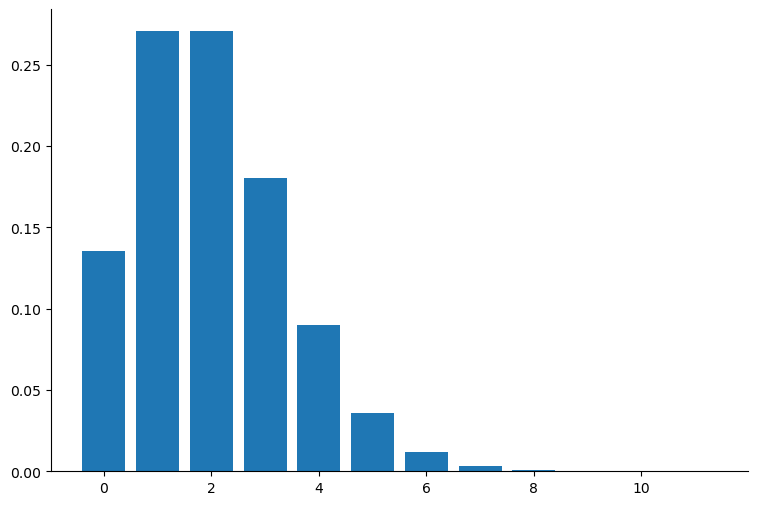

In [223]:
x = np.arange(0, 12)
y = stats.poisson(avg_cars).pmf(x)

plt.bar(x,y)


In [225]:
y

array([1.35335283e-01, 2.70670566e-01, 2.70670566e-01, 1.80447044e-01,
       9.02235222e-02, 3.60894089e-02, 1.20298030e-02, 3.43708656e-03,
       8.59271640e-04, 1.90949253e-04, 3.81898506e-05, 6.94360921e-06])

In [227]:
# Poisson distribution is number of events over a time interval
avg_cars = 2

# used pmf because we are looking for a discrete value
no_cars = stats.poisson(avg_cars).pmf(0)
no_cars

0.1353352832366127

#### What is the probability that 3 or more cars come through the drive through?

In [228]:
# used survival function to measure probabilty that 3 or more cars will come through
three_cars = stats.poisson(avg_cars).sf(2)
three_cars

0.32332358381693654

In [ ]:
sns.histplot() # figure out how to plot

#### How likely is it that the drive through gets at least 1 car?

In [229]:
# used survival function to get values of 1 car or more
stats.poisson(2).sf(0)

0.8646647167633873

### 2.Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:

#### What grade point average is required to be in the top 5% of the graduating class?

In [29]:
# used ppf to get cutoff point to be in the top 5%
stats.norm(3, 0.3).ppf(.95)

3.4934560880854417

#### What GPA constitutes the bottom 15% of the class?

In [30]:
stats.norm(3, 0.3).ppf(.15)

2.689069983151863

#### An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?

In [231]:
stats.norm(3, 0.3).ppf([0.2,0.3]) 
# student with 2.8 GPA does qualify for the scholarship

array([2.74751363, 2.84267985])

#### If I have a GPA of 3.5, what percentile am I in?

In [35]:
stats.norm(3.0,0.3).cdf(3.5)
# 95th percentile

0.9522096477271853

### 3. A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?

In [59]:
stats.binom(4326, 0.02).cdf(97)
# 88% chance that at least 97 people would click through

0.8821846941402153

In [232]:
# class review solution

stats.binom(4326, .02).sf(96)

0.13975823631416448

### 4. You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question.

#### What is the probability that at least one of your first 60 answers is correct?

In [216]:
stats.binom(60, 0.01).sf(1)
# My mistake on the problem is that I thought '1' was inclusive. 

0.12123327131180726

In [208]:
stats.binom.cdf(1,60,.1)

0.013777078966010659

In [234]:
# class review solution

n_trials = 60
p = 0.01

stats.binom(n_trials, p).sf(0)

0.45284335760923855

### 5. The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. How likely is it that the break area gets cleaned up each day? How likely is it that it goes two days without getting cleaned up? All week?

In [96]:
x =stats.binom.cdf(1, 66, 0.03)
x

0.4073659668325024

In [239]:
students = round(.9 * 22 * 3)
students

59

In [240]:
# Class review solution

stats.binom(students, 0.03).sf(0)

0.8342199288437352

In [244]:
two_days = students * 2


In [246]:
stats.binom(two_days, 0.03).pmf(0)

0.027483031992576134

In [247]:
stats.binom(two_days, 0.03).cdf(0)

0.02748303199257622

### 6. You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

In [124]:
mean = 15
std = 3
lunch = 60
order_time = 2 
order_complete = order_time + 10
order_and_eat= 15 + order_complete

In [118]:
t_mean = mean * order_time
t_std = std * order_time

In [125]:
stats.norm(t_mean, t_std).sf(order_and_eat)
# 69.1% chance there will be enough time to order food, get it, and still have 15min left to eat.

0.6914624612740131

In [ ]:
# use sf to get chance you have at least 15min or more for lunch

In [249]:
# Class Review Solution

# used cdf instead, same answer
total_wait_time = 33

stats.norm(t_mean, t_std).cdf(total_wait_time)

0.6914624612740131

### 7. Connect to the employees database and find the average salary of current employees, along with the standard deviation. For the following questions, calculate the answer based on modeling the employees salaries with a normal distribution defined by the calculated mean and standard deviation then compare this answer to the actual values present in the salaries dataset.

In [126]:
import env
import os

In [127]:
def get_db_url(db, env_file = os.path.exists('env.py')):
    '''
    return a formatted string containing username, password, host, and database for connecting to the mySQL server
    and the database indicated.
    env_file checks to see if the env.py exists in cwd
    '''
    if env_file:
        username, password, host = (env.username, env.password, env.host)
        return f'mysql+pymysql://{username}:{password}@{host}/{db}'
    else:
        return 'hello, you need a username and password to get in.'

url = get_db_url('employees')

In [132]:
query = '''
SHOW tables
'''
run_query = pd.read_sql(query, url)

In [133]:
run_query

,Tables_in_employees
0,departments
1,dept_emp
2,dept_manager
3,employees
4,salaries
5,titles


In [196]:
salary = pd.read_sql('SELECT emp_no, salary FROM salaries WHERE to_date > NOW() ORDER BY salary DESC', url)
salary

,emp_no,salary
0,43624,158220
1,254466,156286
2,47978,155709
3,253939,155513
4,109334,155190
...,...,...
240119,230890,39036
240120,15830,39012
240121,401786,38942
240122,245832,38936


In [197]:
a =(salary['salary'] > 60000).sum()
b = len(salary)
a / b

0.729385650747114

In [198]:
m_salary = salary['salary'].mean()
m_salary

72012.23585730705

In [199]:
std_salary = salary['salary'].std()
std_salary

17309.995380251883

#### What percent of employees earn less than 60,000?


In [250]:
stats.norm(m_salary, std_salary).cdf(60000)

0.243857424802143

#### What percent of employees earn more than 95,000?

In [201]:
stats.norm(m_salary, std_salary).sf(95000)

0.0920881919980393

#### What percent of employees earn between 65,000 and 80,000?

In [259]:
between1 = stats.norm(m_salary, std_salary).sf(65000) 
between1

0.6572970780493494

In [260]:
between2 = stats.norm(m_salary, std_salary).cdf(80000)
between2

0.677763490495319

In [263]:
between2 - between1

0.020466412445969584

In [ ]:
# Class Review Solution



In [205]:
salary[(salary['salary'] > 65000) & (salary['salary'] < 80000)]

,emp_no,salary
69789,439207,79999
69790,218540,79999
69791,100554,79999
69792,72969,79999
69793,67611,79998
...,...,...
147850,289369,65001
147851,433266,65001
147852,474959,65001
147853,19317,65001


#### What do the top 5% of employees make?

In [206]:
stats.norm(m_salary, std_salary).ppf(.95)

100484.64454102759

### (HINT) If you're looking at this exercise and wondering "How do I get pandas to talk the database, again?", remember that you'll need 3 things: your .gitignore, your env.py, and to use pd.read_sql. Copy over your .gitignore and env.py from your data science libraries exercises folder, and connect to the employees database like so: